# Домашнее задание №7: деревья, случайный лес (14.5 баллов)
<!-- ![](meme.jpg) -->
<img src="meme.jpg" alt="Drawing" style="width: 700px;"/>


## Часть 1: основы построения решающие дерева

начнём с простого...


### Задание 1.1 (1 балл)
Пусть известно, что в вершину решающего дерева попали 10 объектов, 8 из которых имеют метку класса $k_1$, а 2 - $k_2$. Посчитайте энтропию (с натуральным логарифмом). Ответ округлите до двух знаков после запятой.

#### (*・‿・)ノ⌒*:･ﾟ✧

In [ ]:
print(f'H = {-round(0.8*np.log(0.8) + 0.2*np.log(0.2), 2)}')

H = 0.5


### Задание 1.2 (1 балл)
Пусть дополнительно известно, что вершина из предыдущего задания не является листовой и возможно такое разбиение, что в левое поддерево попадут все объекты класса $k_1$, а в правое - класса $k_2$. Посчитайте критерий информативности (в формулировке разности impurity пришедшей выборки и полученного разбиения) такой вершины с применением индекса Джини. Ответ округлите до двух знаков после запятой.

По формуле критерий информативности - разница между энтропией исходного распределения и взвешенной суммой энтропий подразбиений.  Так как по условию выборка была разделена идеально на следующем шаге, то в каждом подразбиении на нем энтропия нулевая, следовательно, критерий информативности численно равен энтропии первого шага - 0.5


#### (￣▽￣)/♫•*¨*•.¸¸♪

### Задание 1.3 (0.5 балла)
Пусть при построении дерева образовалась листовая вершина с 10 объектами, значения целевой переменной для которых следующие: [1, 10, 5, 18, 100, 30, 50, 61, 84, 47] (решается задача регрессии). Чему будут равны предсказания модели для этих объектов?

Предсказание в листе для регресии - это функция от значений целевого признака объектов обучающей выборки, оказавшихся в листе, как правило (и на лекции предлагалось), среднее, то есть в этом случае:


In [ ]:
np.mean([1, 10, 5, 18, 100, 30, 50, 61, 84, 47])

40.6

#### ༼ つ ◕_◕ ༽つ

## Часть 2: решающие деревья

### Задание 2.1 (2 балла)
Первым делом реализуйте функцию `find_best_split`, которая должна находить оптимальное разбиение подмножества обучающей выборки. При решении задачи регрессии испольуйте дисперсию подвыборки, при решении задачи классификации используйте критерий Джини. Эту функцию можно протестировать на датасете `Boston` из `sklearn`.

In [1]:
from collections import Counter
from typing import Dict, List, Tuple, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [50]:
boston = load_boston()
X = pd.DataFrame(data=boston["data"], columns=boston["feature_names"])
y = boston["target"]
X.head()

print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

При решении задания имейте в виду, что под критерием Джини подразумевается такая функция:

$$Q(R) = -\frac {|R_{\ell}|}{|R|}H(R_\ell) -\frac {|R_r|}{|R|}H(R_r) ,$$

где $R$ — множество объектов, попавших в вершину, $R_{\ell}$ и $R_r$ — объекты, попавшие в левое и правое поддеревья,
$H(R) = 1 - p_1^2 - p_0^2$, $p_1$, $p_0$ — доли объектов класса 1 и 0 соответственно.

Для категориальных признаков применяется наивный алгоритм разбиения: мы пытаемся найти одно значение, разбиение по которому сильнее всего увеличит критерий информативности. Иными словами, объекты с конкретным значением признака отправляем в левое поддерево, остальные - в правое. Обратите внимание, что это далеко не оптимальные способ учёта категориальных признаков. Например, можно было бы на каждое значение категориального признака создавать отдельное поддерево или использовать более сложные подходы. Подробнее об этом можно прочитать в конспектах [лекций](https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture07-trees.pdf) по машинному обучению на ПМИ (раздел «Учёт категориальных признаков»).

В качестве подсказок реализации можете пользоваться кодом из бонусной части семинара по решающим деревьям (скачайте решённую версию ноутбука).

**Note:** Разрешается делать цикл для перебора порогов, но возможна имплементация без него. За имплементацию без цикла бонус 0.7 балла

In [48]:
def H(R):
  p = np.unique(R, return_counts = True)[1]/R.shape[0]
  return 1-np.sum(p**2)
 

In [3]:
def regression_Q(R, t):
  if type(t) == str:
    return (R[R['feature']  == t].shape[0]/ R.shape[0]) * R[R['feature'] == t]['target'].var() + (R[~(R['feature']  == t)].shape[0]/R.shape[0]) * R[~(R['feature']  == t)]['target'].var()
  else:
    return (R[R['feature']  < t].shape[0]/R.shape[0]) * R[R['feature']  < t]['target'].var() + (R[R['feature'] > t].shape[0]/R.shape[0]) * R[R['feature']  > t]['target'].var()


In [4]:
def classification_Q(R, t, t_type='categoriacal'):
  if t_type == 'categoriacal':
    return -(R[R['feature']  == t].shape[0]/ R.shape[0]) * H(R[R['feature'] == t]['target']) - (R[~(R['feature']  == t)].shape[0]/R.shape[0]) * H(R[~(R['feature']  == t)]['target'])
  else:
    return -(R[R['feature']  < t].shape[0]/R.shape[0]) * H(R[R['feature']  < t]['target']) - (R[R['feature']  > t].shape[0]/R.shape[0]) * H(R[R['feature']  > t]['target'])


In [6]:
def find_best_split(
    feature_vector: Union[np.ndarray, pd.DataFrame], 
    target_vector: Union[np.ndarray, pd.Series],
    task: str = "classification",
    feature_type: str = "real"
) -> Tuple[np.ndarray, np.ndarray, float, float]:
    """
    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини или дисперсии нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)
    :param task: либо `classification`, либо `regression`
    :param feature_type: либо `real`, либо `categorical`
    
    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    if feature_type == 'real':
      sorted_features = list(feature_vector.sort_values().unique())
      thresholds = [(sorted_features[i] + sorted_features[i+1]) / 2  for i in range(len(sorted_features)-1)]
    elif feature_type == 'categorical':
      thresholds = list(set(feature_vector))
    R = pd.DataFrame(columns=['feature', 'target'])
    R['feature'] = feature_vector
    R['target'] = target_vector
    if task == 'classification':
      Q_array = [classification_Q(R, threshold) for threshold in thresholds]
      Q_array = np.nan_to_num(Q_array, nan=float("-inf")) 
      Q_best = np.max(Q_array)
      best_threshold = thresholds[np.argmax(Q_array)]
    else:
      Q_array = [regression_Q(R, threshold) for threshold in thresholds]
      Q_array = np.nan_to_num(Q_array, nan=float("inf")) 
      Q_best = np.min(Q_array)
      best_threshold = thresholds[np.argmin(Q_array)]
    return thresholds, Q_array, best_threshold, Q_best 


In [ ]:
thresholds, variances, threshold_best, variance_best = find_best_split(
    X["CRIM"], 
    y, 
    task="regression",
    feature_type="real"
)

In [ ]:
X['CRIM'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [ ]:
X['CRIM'].var()

73.98657819906929

Выведите график зависимости значения критерия ошибки от порогового значения при разбиении вершины по признаку `CRIM`.

In [ ]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 8))
plt.plot(thresholds, variances)
plt.title('CRIM | optimal t: {:.3f} | optimum Q-error: {:.2f}'.format(threshold_best, variance_best))
plt.xlabel("threshold")
plt.ylabel("Q-error")
plt.axvline(x=threshold_best, c='m')
plt.show()

### Задание 2.2 (3 балла)
Разберитесь с написанным кодом решающего дерева, заполните пропуски в коде и реализуйте недостающий метод _predict_node.

Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции в разделе «Построение дерева».
- Выбор лучшего разбиения необходимо производить по критерию Джини
- Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку
- Ответ в листе: наиболее часто встречающийся класс в листе

In [51]:
class DecisionTree:
    def __init__(
        self, 
        feature_types: Union[List[str], np.ndarray], 
        max_depth: int = None, 
        min_samples_split: int = None, 
        min_samples_leaf: int = None,
        task: str = "classification"
    ) -> None:
        
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        # В этой переменной будем хранить узлы решающего дерева. Каждая вершина хранит в себе идентификатор того,
        # является ли она листовой. Листовые вершины хранят значение класса для предсказания, нелистовые - правого и
        # левого детей (поддеревья для продолжения процедуры предсказания)
        self._tree = {}
        
        # типы признаков (категориальные или числовые)
        self._feature_types = feature_types
        
        # гиперпараметры дерева
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
        self.task = task

    def _fit_node(
        self, 
        sub_X: np.ndarray, 
        sub_y: np.ndarray, 
        node: dict
    ) -> None:
        #print(sub_X)
        #print()
        #print(sub_y.shape, sub_y)
        # критерий останова
        #print(sub_y[0])
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            #print('terminal')
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            categories_map = {}

            # подготавливаем признак для поиска оптимального порога
            if feature_type == "real":
                feature_vector = sub_X.iloc[:, feature]
            elif feature_type == "categorical":
                # здесь могла быть реализация более сложного подхода к обработке категориального признака
                feature_vector = sub_X.iloc[:, feature]

            # ищем оптимальный порог
            _, _, threshold, gini = find_best_split(feature_vector, sub_y, self.task, feature_type)
            
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini

                # split - маска на объекты, которые должны попасть в левое поддерево
                if feature_type == "real":
                    
                    threshold_best = threshold
                    split = sub_X.iloc[:, feature_best] < threshold_best
                    # ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
                elif feature_type == "categorical":
                    # в данной реализации это просто значение категории
                    threshold_best = threshold
                    split = (sub_X.iloc[:, feature_best] == threshold_best) 
                    # ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
                else:
                    raise ValueError

        # записываем полученные сплиты в атрибуты класса
        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["category_split"] = threshold_best
        else:
            raise ValueError
            
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])

    def predict_node(self, x: np.ndarray, node: dict) -> int:
        """
        Предсказание начинается с корневой вершины дерева и рекурсивно идёт в левое или правое поддерево в зависимости от значения
        предиката на объекте. Листовая вершина возвращает предсказание.
        :param x: np.array, элемент выборки
        :param node: dict, вершина дерева
        """
        if node['type'] == 'terminal':
          return node['class']

        return self.predict_node(x, node['left_child']) if x.iloc[node['feature_split']] < node['category_split'] else self.predict_node(x, node['right_child'])
        
        # ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
        #pass

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        self._fit_node(X, y, self._tree)

    def predict(self, X: np.ndarray) -> np.ndarray:
        predicted = []
        for x in range(X.shape[0]):
          predicted.append(self.predict_node(X.iloc[x, :], self._tree))
            
        return np.array(predicted)

### Задание 2.3 (1 балл)
Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
students_df = pd.read_csv('students.csv', sep=",")
students_df


STG   SCG   STR   LPR   PEG   UNS
0    0.00  0.00  0.00  0.00  0.00     0
1    0.08  0.08  0.10  0.24  0.90     1
2    0.06  0.06  0.05  0.25  0.33     0
3    0.10  0.10  0.15  0.65  0.30     1
4    0.08  0.08  0.08  0.98  0.24     0
..    ...   ...   ...   ...   ...   ...
253  0.61  0.78  0.69  0.92  0.58     1
254  0.78  0.61  0.71  0.19  0.60     1
255  0.54  0.82  0.71  0.29  0.77     1
256  0.50  0.75  0.81  0.61  0.26     1
257  0.66  0.90  0.76  0.87  0.74     1

[258 rows x 6 columns]

In [ ]:
students_df.columns.values

array(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS'], dtype=object)

In [ ]:
stud_y = students_df[' UNS']
stud_X = students_df[['STG', 'SCG', 'STR', 'LPR', 'PEG']]
stud_X.head()

STG   SCG   STR   LPR   PEG
0  0.00  0.00  0.00  0.00  0.00
1  0.08  0.08  0.10  0.24  0.90
2  0.06  0.06  0.05  0.25  0.33
3  0.10  0.10  0.15  0.65  0.30
4  0.08  0.08  0.08  0.98  0.24

In [ ]:
fig = plt.figure(figsize=(12, 8))


for feature in stud_X.columns.values:
  thresholds, variances, threshold_best, variance_best = find_best_split(
    stud_X[feature], 
    stud_y, 
    task="classification",
    feature_type="real"
    ) 
  plt.plot(thresholds, variances, label=feature)
  
plt.title('Q-error threshold dependency')
plt.xlabel("threshold")
plt.ylabel("Q-error")
fig.legend()
plt.show()

In [ ]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-

### Задание 2.4 (1 балл)

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

In [ ]:
plt.scatter(stud_X['STG'], stud_y)
plt.title('STG')

Text(0.5, 1.0, 'STG')

In [ ]:
plt.scatter(stud_X['SCG'], stud_y)
plt.title('SCG')

Text(0.5, 1.0, 'SCG')

Text(0.5, 1.0, 'STR')

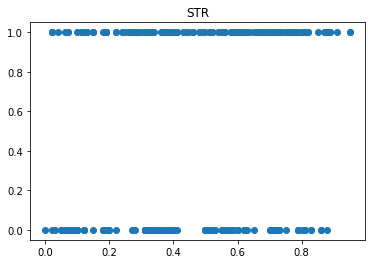

In [ ]:
plt.scatter(stud_X['STR'], stud_y)
plt.title('STR')

Text(0.5, 1.0, 'LPR')

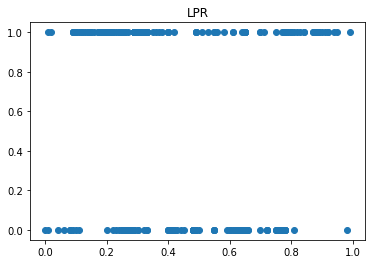

In [ ]:
plt.scatter(stud_X['LPR'], stud_y)
plt.title('LPR')

Text(0.5, 1.0, 'PEG')

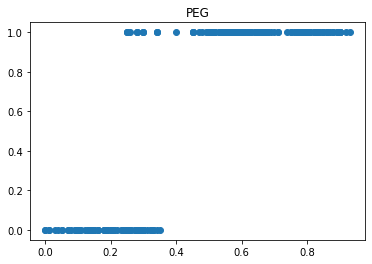

In [ ]:
plt.scatter(stud_X['PEG'], stud_y)
plt.title('PEG')

###Вывод: 
лучше всего подходит PEG, так как классы, значения целевой переменной, при разных его диапазонах перекрываются минимально.

ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-

### Задание 2.5 (1 балл)

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

In [9]:
m_df = pd.read_csv('/content/agaricus-lepiota.data', sep=',')
m_y = m_df['p']
m_df.drop(['p'], axis=1, inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
m_df = m_df[m_df.select_dtypes('object').columns.values].apply(le.fit_transform)
m_df

x  s  n  t  p.1  f  c  n.1   k  ...  w  w.1  p.2  w.2  o  p.3  k.1  s.3  u
0     5  2  9  1    0  1  0    0   4  ...  7    7    0    2  1    4    3    2  1
1     0  2  8  1    3  1  0    0   5  ...  7    7    0    2  1    4    3    2  3
2     5  3  8  1    6  1  0    1   5  ...  7    7    0    2  1    4    2    3  5
3     5  2  3  0    5  1  1    0   4  ...  7    7    0    2  1    0    3    0  1
4     5  3  9  1    0  1  0    0   5  ...  7    7    0    2  1    4    2    2  1
...  .. .. .. ..  ... .. ..  ...  ..  ... ..  ...  ...  ... ..  ...  ...  ... ..
8118  3  2  4  0    5  0  0    0  11  ...  5    5    0    1  1    4    0    1  2
8119  5  2  4  0    5  0  0    0  11  ...  5    5    0    0  1    4    0    4  2
8120  2  2  4  0    5  0  0    0   5  ...  5    5    0    1  1    4    0    1  2
8121  3  3  4  0    8  1  0    1   0  ...  7    7    0    2  1    0    7    4  2
8122  5  2  4  0    5  0  0    0  11  ...  5    5    0    1  1    4    4    1  2

[8123 rows x 22 columns]

In [42]:
mX_train, mX_test, my_train, my_test = train_test_split(m_df, m_y, test_size=0.5, random_state=13)

In [ ]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-
tr = DecisionTree(feature_types=['categorical' for i in range(22)], max_depth=10)
tr.fit(mX_train, np.array(my_train))

In [53]:
y_pred = tr.predict(mX_test)
y_pred


array(['e', 'e', 'e', ..., 'p', 'e', 'e'], dtype='<U1')

In [56]:
from sklearn.metrics import accuracy_score

print(f'Accuracy на тестовой выборке {round(accuracy_score(my_test, y_pred), 2)}')

Accuracy на тестовой выборке 0.72


## Часть 3: бэггинг, случайный лес

В данной части будем работать [с задачей предсказания диабета у пациента](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data). Посмотрим на работу бэггинга над решающими деревьями и случайного леса, сравним их работу.

In [8]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data = pd.read_csv('diabetes.csv')
print(f"Dataset shape: {data.shape}")
data.head()

Dataset shape: (768, 9)


Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

Посмотрим на распределение целевой переменной

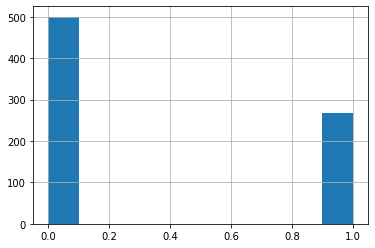

In [ ]:
data['Outcome'].hist()
plt.show()

Разделите данные на признаки и целевую переменную. Разбейте датасет на тренировочную и тестовую части в отношении 70:30.

In [ ]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-

In [ ]:
X, y = data.drop('Outcome', axis=1), data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

### Задание 3.1 (1 балл)

Обучите [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) на 50 деревьях. Оцените качество классификации на тестовой выборке по метрикам `accuracy`, `precision` и `recall`, `auc_roc`.

In [ ]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-

In [ ]:
bag_clf = BaggingClassifier(n_estimators=50)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=50,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
print(f'Accuracy = {round(accuracy_score(bag_clf.predict(X_test), y_test), 3)}')
print(f'Precision = {round(precision_score(bag_clf.predict(X_test), y_test), 3)}')
print(f'AUC ROC = {round(roc_auc_score(bag_clf.predict(X_test), y_test), 3)}')

Accuracy = 0.719
Precision = 0.437
AUC ROC = 0.713


### Задание 3.2 (1 балл)

Теперь обучите Random Forest с таким же количеством деревьев. Оцените качество классификации по тем же метрикам. Какая из двух построенных моделей показала себя лучше?

In [ ]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-

In [ ]:
rndf_clf = RandomForestClassifier(n_estimators=50)
rndf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(f'Accuracy = {round(accuracy_score(rndf_clf.predict(X_test), y_test), 3)}')
print(f'Precision = {round(precision_score(rndf_clf.predict(X_test), y_test), 3)}')
print(f'AUC ROC = {round(roc_auc_score(rndf_clf.predict(X_test), y_test), 3)}')

Accuracy = 0.723
Precision = 0.46
AUC ROC = 0.716


#### Комментарий: 
На мой взгляд, в случае с диабетом страшнее пропустить больного человека, чем напугать здорового. А следовательно, точность менее приоритетна, чем доля правильных товетов или общая способность разделять классы, поэтому я считаю лучшей вторую модель, Random Forest: у неё accuracy и roc_auc выше. 

### Задание 3.3 (1 балл)

Для случайного леса проанализируйте значение AUC-ROC на этих же данных в зависимости от изменения параметров (можете сделать обычный перебор с обучением/тестированием в цикле):
* `'n_estimators'` (можно перебрать около 10 значений из отрезка от 10 до 1500)
* `'min_samples_leaf'` (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости AUC-ROC от этих параметров. Используйте heat map для визуализации. Какие выводы вы можете сделать?

In [ ]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-

In [ ]:
import itertools
import seaborn as sns

In [ ]:
grid = itertools.product(range(10, 1500, 140), range(1, 22, 5))
clfs = {params:RandomForestClassifier(n_estimators=params[0], min_samples_leaf=params[1]).fit(X_train, y_train) for params in grid}

In [ ]:
roc_aucs = {params:roc_auc_score(y_test, clfs[params].predict(X_test)) for params in clfs.keys()}
#roc_aucs

In [ ]:
score_df = pd.DataFrame([[list(roc_aucs.values())[i], list(roc_aucs.keys())[i][0], list(roc_aucs.keys())[i][1]] for i in range(len(roc_aucs))], columns=['score', 'n_estimators', 'min_samples_leaf'])

In [ ]:
score_df

score  n_estimators  min_samples_leaf
0   0.661758            10                 1
1   0.685824            10                 6
2   0.661758            10                11
3   0.645594            10                16
4   0.622725            10                21
5   0.707735           150                 1
6   0.682471           150                 6
7   0.670977           150                11
8   0.670977           150                16
9   0.634219           150                21
10  0.684746           290                 1
11  0.670977           290                 6
12  0.665230           290                11
13  0.653736           290                16
14  0.645714           290                21
15  0.687021           430                 1
16  0.688218           430                 6
17  0.677921           430                11
18  0.650263           430                16
19  0.657208           430                21
20  0.701988           570                 1
21  0.669780           570                 6
22  0.667505           570                11
23  0.650263           570                16
24  0.642241           570                21
25  0.688218           710                 1
26  0.667505           710                 6
27  0.659483           710                11
28  0.659483           710                16
29  0.647989           710                21
30  0.682471           850                 1
31  0.676724           850                 6
32  0.664033           850                11
33  0.644516           850                16
34  0.642241           850                21
35  0.684746           990                 1
36  0.682471           990                 6
37  0.665230           990                11
38  0.647989           990                16
39  0.651461           990                21
40  0.684746          1130                 1
41  0.667505          1130                 6
42  0.665230          1130                11
43  0.656011          1130                16
44  0.645714          1130                21
45  0.688218          1270                 1
46  0.664033          1270                 6
47  0.667505          1270                11
48  0.647989          1270                16
49  0.645714          1270                21
50  0.688218          1410                 1
51  0.678999          1410                 6
52  0.665230          1410                11
53  0.653736          1410                16
54  0.639966          1410                21

In [ ]:
heatdf = pd.pivot(score_df, columns=['n_estimators'], index=['min_samples_leaf'], values=['score'])
heatdf

score                      ...                              
n_estimators          10        150       290   ...      1130      1270      1410
min_samples_leaf                                ...                              
1                 0.661758  0.707735  0.684746  ...  0.684746  0.688218  0.688218
6                 0.685824  0.682471  0.670977  ...  0.667505  0.664033  0.678999
11                0.661758  0.670977  0.665230  ...  0.665230  0.667505  0.665230
16                0.645594  0.670977  0.653736  ...  0.656011  0.647989  0.653736
21                0.622725  0.634219  0.645714  ...  0.645714  0.645714  0.639966

[5 rows x 11 columns]

Text(0.5, 1.0, 'Зависимость AUC-Roc от колличества решающих деревьев и минимального количества листьев в дереве')

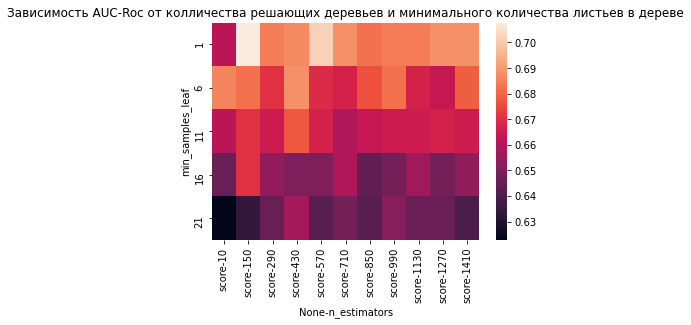

In [ ]:
fig = sns.heatmap(heatdf)
plt.title(f'Зависимость AUC-Roc от колличества решающих деревьев и минимального количества листьев в дереве')

#### Комментарий:
Лучшей оказалась модель со 150 решающими деревьями и минимальным количеством элементов в листе равным 1.

### Задание 3.4 (1 балл)

Для лучшей модели случайного леса посчитайте важность признаков и постройте bar plot. Какой признак оказался самым важным для определения диабета?

In [ ]:
# ᕕ(╭ರ╭ ͟ʖ╮•́)⊃¤=(————-

In [ ]:
importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": clfs[(150, 1)].feature_importances_
}).sort_values(by="importance", ascending=False)
importance_df

feature  importance
1                   Glucose    0.268288
5                       BMI    0.153685
7                       Age    0.143148
6  DiabetesPedigreeFunction    0.123780
2             BloodPressure    0.088705
0               Pregnancies    0.086088
3             SkinThickness    0.069395
4                   Insulin    0.066910

Самый важный признак - это уровень глюкозы (Glucose).

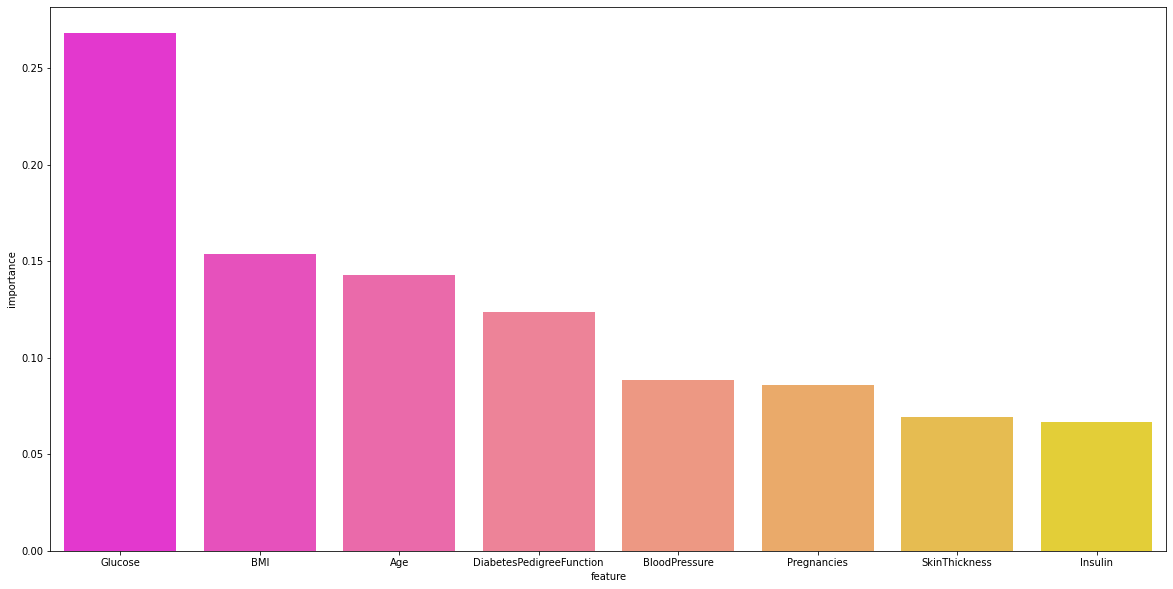

In [ ]:
fig = plt.figure(figsize=(20, 10))
sns.barplot(x=importance_df['feature'], y=importance_df['importance'], palette='spring')